In [ ]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [ ]:
df = pd.read_csv('wine-reviews.csv')

In [ ]:
df.head()

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87


In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
df['description']

0         Aromas include tropical fruit, broom, brimston...
1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2012, this...
                                ...                        
129966    Notes of honeysuckle and cantaloupe sweeten th...
129967    Citation is given as much as a decade of bottl...
129968    Well-drained gravel soil gives this wine its c...
129969    A dry style of Pinot Gris, this is crisp with ...
129970    Big, rich and off-dry, this is powered by inte...
Name: description, Length: 129971, dtype: object

In [ ]:
reviews_embeddings = embed(df['description'].values[:1000])
#poso ima 129970 redici zatoa zimam samo 1000

In [ ]:
reviews_embeddings

<tf.Tensor: shape=(1000, 512), dtype=float32, numpy=
array([[ 0.00015805,  0.06762408, -0.0705656 , ...,  0.06067877,
        -0.00955578,  0.01283711],
       [-0.0364522 ,  0.00990593, -0.07908089, ...,  0.07189664,
        -0.01359518, -0.01938628],
       [-0.02578051,  0.04017386, -0.07346956, ...,  0.01819539,
        -0.00317969, -0.05949123],
       ...,
       [-0.05792476,  0.03696178, -0.06557038, ...,  0.05331539,
        -0.03179858, -0.00467106],
       [-0.06040617, -0.0230534 , -0.04214419, ...,  0.01388268,
        -0.04505577, -0.03900748],
       [-0.02853238,  0.01543543, -0.06507035, ...,  0.02067406,
        -0.04406882, -0.0394352 ]], dtype=float32)>

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertia = []
for i in range(1,10):
  kmeans=KMeans(n_clusters=int(i))
  kmeans.fit(reviews_embeddings)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

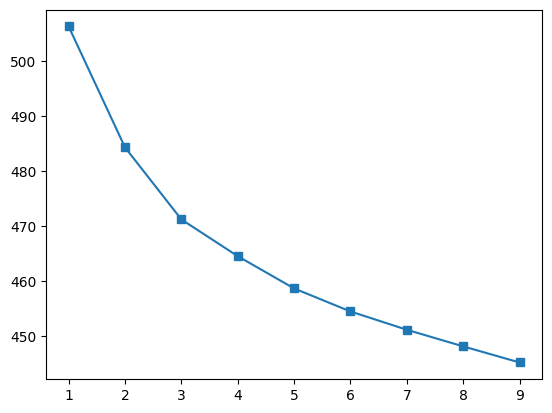

In [ ]:
plt.plot(range(1,10),inertia,marker='s')

In [ ]:
kmeans.fit(reviews_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
kmeans.inertia_

471.1979901577792

In [ ]:
model = KMeans(n_clusters=3)

In [ ]:
model.fit(reviews_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
clusters = model.labels_

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(10)

In [ ]:
reviews_embeddings_10d = pca.fit_transform(reviews_embeddings)

In [ ]:
reviews_embeddings_10d

array([[-0.31366948,  0.13053393, -0.02245173, ..., -0.07881859,
         0.12458891, -0.00556364],
       [ 0.27556956,  0.19151728,  0.07868502, ..., -0.07155987,
        -0.08256822, -0.01779538],
       [-0.10245644,  0.23004192,  0.171167  , ..., -0.01189492,
         0.05399186, -0.12224588],
       ...,
       [ 0.18831107, -0.05520307, -0.07635657, ...,  0.14573427,
        -0.14224207, -0.04969807],
       [ 0.11318696,  0.13819518,  0.03321222, ..., -0.09154432,
        -0.05539232,  0.13354114],
       [-0.15204341,  0.26349118,  0.12913612, ...,  0.15710017,
         0.02003234, -0.09455596]])

In [ ]:
type(clusters)

numpy.ndarray

In [ ]:
set(clusters)

{0, 1, 2}

In [ ]:
clusters==1

array([ True, False,  True,  True, False, False, False, False,  True,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False,  True, False, False,  True, False,
       False,  True,  True,  True, False, False,  True,  True, False,
       False,  True,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True,  True,  True,  True, False,  True, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
        True,  True,

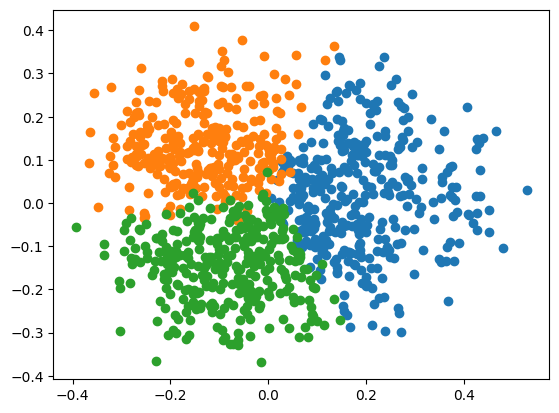

In [ ]:
for i in range(0,3):
  plt.scatter(reviews_embeddings_10d[clusters==i,0],reviews_embeddings_10d[clusters==i,1],label=i)